In [1]:
!pip install deap

In [2]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import elitism
import graphs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 5
MAX_COLORS = 5

In [23]:
def getCost(individual):
    return gcp.getCost(individual),  # return a tuple

gcp = graphs.GraphColoringProblem(nx.mycielski_graph(5), HARD_CONSTRAINT_PENALTY)

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("Integers", random.randint, 0, MAX_COLORS - 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.Integers, len(gcp))
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", getCost)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=MAX_COLORS - 1, indpb=1.0/len(gcp))

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", numpy.min)
stats.register("avg", numpy.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

In [25]:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("number of colors = ", gcp.getNumberOfColors(best))
print("Number of violations = ", gcp.getViolationsCount(best))
print("Cost = ", gcp.getCost(best))

-- Best Individual =  [0, 3, 0, 2, 4, 4, 2, 2, 2, 4, 1, 4, 3, 1, 3, 3, 4, 4, 2, 2, 4, 3, 0]
-- Best Fitness =  5.0

number of colors =  5
Number of violations =  0
Cost =  5


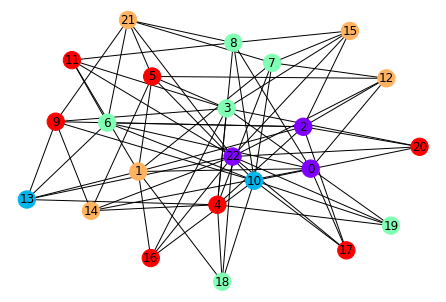

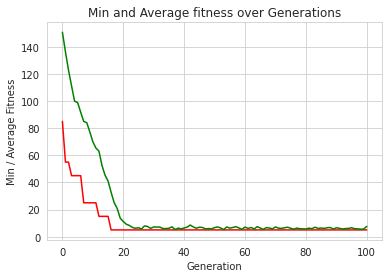

In [26]:
plt.figure(1)
gcp.plotGraph(best)

plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()